## Assignment 1 Martin Sævareid Lauritsen

### Task 1 counting the steps:
In task 1 the objective is to implement the for listed sorting methods and record the number of steps. Then visualize the step count as a function of the input size, and check that they match the asymptotic running time correlating to the methods. The four methods are: Insertion-sort, Merge-sort, Heap-sort, Quick-sort.

In [22]:
import matplotlib.pyplot as plt
import numpy as np
import random
import time
import pandas as pd
from tabulate import tabulate

#### Insertion sort:

In [2]:
def InsertionSort(list):
    stepCount = 0

    for i in range(1, len(list)):
        key = list[i]
        j = i - 1
        stepCount += 1

        while j >= 0 and list[j] > key:
            list[j+1] = list[j]
            j -= 1
            stepCount += 1
        
        list[j+1] = key

    return list, stepCount

#### Merge sort:

In [3]:
def MergeSort(list):
    # stepCount as an int was not able to be correctly calculated because of recurssion, so a list was needed
    stepCount = [0]
    
    def merge_sort(list):
        if len(list) <= 1:
            return list
        
        middle = len(list)//2
        left = merge_sort(list[:middle])
        right = merge_sort(list[middle:])

        return merge(left, right)
    
    def merge(left, right):
        res = []
        i = j = 0

        while i < len(left) and j < len(right):
            stepCount[0] += 1
            #print(left[i], right[j])
            if left[i] < right[j]:
                res.append(left[i])
                i += 1
            else:
                res.append(right[j])
                j += 1
        res.extend(left[i:])
        res.extend(right[j:])
        return res
    
    merge_sort(list)
    return list, stepCount[0]

#### Heap sort:

In [4]:
def HeapSort(list):
    stepCount = [0]

    def heapify(arr, n, i):
    
        # Initialize largest as root
        largest = i 
        
        #  left index = 2*i + 1
        lI = 2 * i + 1 
        
        # right index = 2*i + 2
        rI = 2 * i + 2  

        # If left child is larger than root
        if lI < n and arr[lI] > arr[largest]:
            largest = lI

        # If right child is larger than largest so far
        if rI < n and arr[rI] > arr[largest]:
            largest = rI

        # If largest is not root
        if largest != i:
            arr[i], arr[largest] = arr[largest], arr[i]  # Swap

            # Recursively heapify the affected sub-tree
            heapify(arr, n, largest)
        stepCount[0] += 1
    
    n = len(list) 

    # Build heap (rearrange array)
    for i in range(n // 2 - 1, -1, -1):
        heapify(list, n, i)

    # One by one extract an element from heap
    for i in range(n - 1, 0, -1):
    
        # Move root to end
        list[0], list[i] = list[i], list[0] 

        # Call max heapify on the reduced heap
        heapify(list, i, 0)
        stepCount[0] += 1

    return list, stepCount

#### Quick sort:

In [5]:
def QuickSort(list):
    stepCount = [0]
    def quick_sort(array):
        if len(array) <= 1:
            return array
        
        pivot = array[len(array) // 2]
        left = [x for x in array if x < pivot]
        middle = [x for x in array if x == pivot]
        right = [x for x in array if x > pivot]

        stepCount[0] += len(array) - 1

        return quick_sort(left) + middle + (right)
    
    quick_sort(list)
    return list, stepCount[0]

#### Execution and visualization:

In [6]:
# Creating a dictionary with all sorting methods containing the accumulated random case, worst case and n count for each run through
def collectStepCounts(maxN):
    sortStepDict = {
        "InsertionSort": {"random": [], "worst": []},
        "MergeSort": {"random": [], "worst": []},
        "HeapSort": {"random": [], "worst": []},
        "QuickSort": {"random": [], "worst": []},
        "nCount": []
    }
    
    for n in range(1, maxN + 1, 10):
        #Randomized list
        randList = [random.randint(0, 1000) for _ in range(n)]
        _, stepCountIns = InsertionSort(randList[:])
        _, stepCountMerge = MergeSort(randList[:])
        _, stepCountHeap = HeapSort(randList[:])
        _, stepCountQuick = QuickSort(randList[:])

        sortStepDict["InsertionSort"]["random"].append(stepCountIns)
        sortStepDict["MergeSort"]["random"].append(stepCountMerge)
        sortStepDict["HeapSort"]["random"].append(stepCountHeap)
        sortStepDict["QuickSort"]["random"].append(stepCountQuick)

        #Worst case list
        worstCase = list(range(n, 0, -1))
        _, stepCountIns = InsertionSort(worstCase[:])
        worstCase = worstCaseMergeSort(n)
        _, stepCountMerge = MergeSort(worstCase[:])
        _, stepCountHeap = HeapSort(worstCase[:])
        worstCase = list(range(1, n + 1))
        _, stepCountQuick = QuickSort(worstCase[:])

        sortStepDict["InsertionSort"]["worst"].append(stepCountIns)
        sortStepDict["MergeSort"]["worst"].append(stepCountMerge)
        sortStepDict["HeapSort"]["worst"].append(stepCountHeap)
        sortStepDict["QuickSort"]["worst"].append(stepCountQuick)

        sortStepDict["nCount"].append(n)
    return sortStepDict

def worstCaseMergeSort(maxN):
    result = []
    left, right = 1, maxN
    while left < right:
        result.append(right)
        result.append(left)
        right -= 1
        left += 1
    if maxN % 2 == 1:  # If max_n is odd, append the middle element
        result.append(left)
    return result


[10, 9, 8, 7, 6, 5, 4, 3, 2, 1]
12


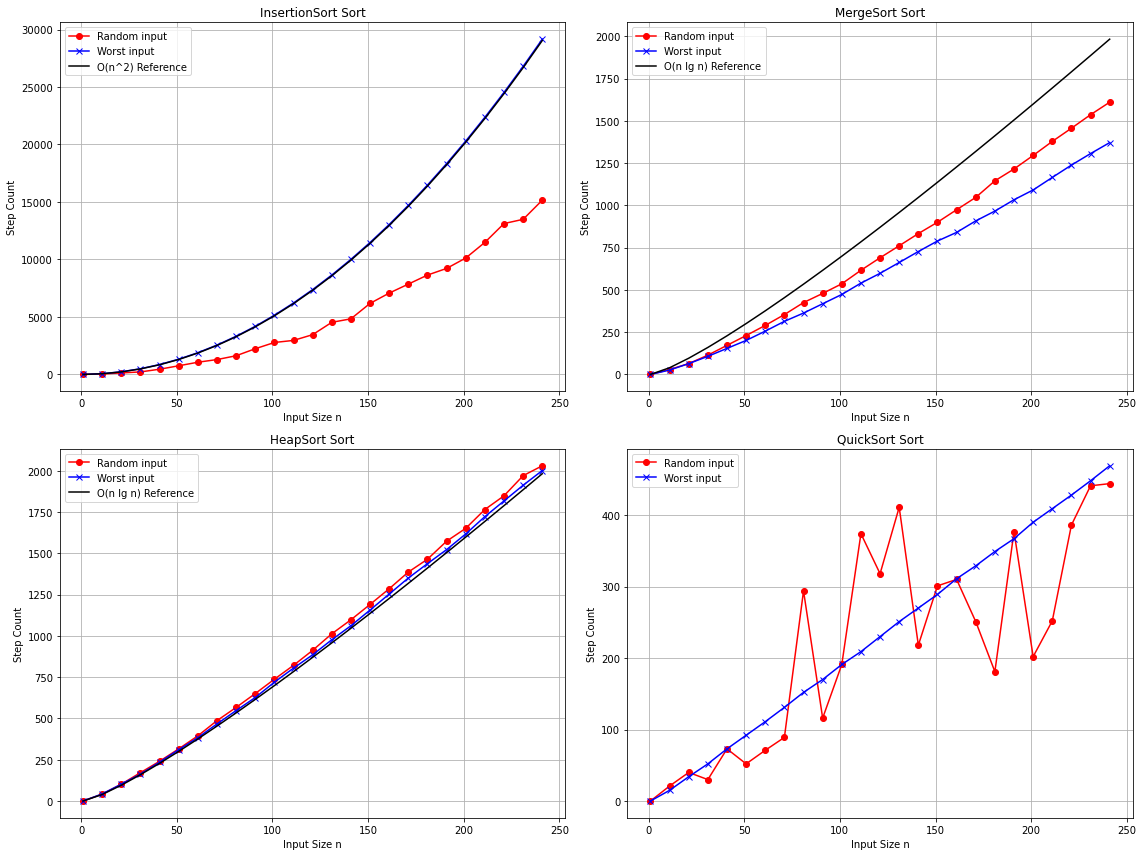

In [7]:
unSortedList = [10, 9, 8, 7, 6, 5, 4, 3, 2, 1]
stepDict = collectStepCounts(250)

sortedList, steps = QuickSort(unSortedList)
print(sortedList)
print(steps)

# Plot
listSizes = stepDict["nCount"]

fig, axs = plt.subplots(2, 2, figsize=(16, 12))
sortAlgos = ["InsertionSort", "MergeSort", "HeapSort", "QuickSort"]

for axis, algo in zip(axs.flat, sortAlgos):
    randomCase = stepDict[algo]["random"]
    worstCase = stepDict[algo]["worst"]
    #print(listSizes)
    #print("Random: ", randomCase)
    #print("Worst: ", worstCase)
    axis.plot(listSizes, randomCase, label="Random input", color="red", marker="o")
    axis.plot(listSizes, worstCase, label="Worst input", color="blue", marker="x")
    if algo in ["InsertionSort"]:
        axis.plot(listSizes, [0.5 * n**2 for n in listSizes], label="O(n^2) Reference", color="black")
    elif algo in ["MergeSort", "HeapSort"]:
        axis.plot(listSizes, [1.5*(n*np.log(n)) for n in listSizes], label="O(n lg n) Reference", color="black")

    axis.set_title(f"{algo} Sort")
    axis.set_xlabel("Input Size n")
    axis.set_ylabel("Step Count")
    axis.legend()
    axis.grid()


#plt.figure(figsize=(8, 6))
#plt.plot(listSizes, stepDict["InsertionSort"]["random"], label="Random input", color="red", marker="o")
#plt.plot(listSizes, stepDict["InsertionSort"]["worst"], label="Worst input", color="blue", marker="x")
#plt.plot(listSizes, [0.5 * n**2 for n in listSizes], label="O(n^2) Reference", color="black")
#plt.xlabel("Input sizes n")
#plt.ylabel("Step counts")
#plt.legend()
#plt.grid()
plt.tight_layout()
plt.show()


## Task 2 compare true execution time

In task 2 we will be comparing the true execution time of insertion sort in python and go, Go code can be located in the file "insertion_sort.go"

In [33]:
nArray = [50, 100, 250, 500, 750, 1000, 2000, 5000]
nTimeElapsed = []

for n in nArray:
    list = [random.randint(0, 1000) for _ in range(n)]

    startTime = time.time()
    InsertionSort(list)
    endTime = time.time()
    nTimeElapsed.append(endTime - startTime)
    print(f"Insertion sort in python used a total of {(endTime - startTime)* 1000:.4f}ms with n = {n}")

i = 0
for nTime in nTimeElapsed:
    nTimeElapsed[i] = f"{(nTime * 1000):.4f}"
    i += 1

Insertion sort in python used a total of 0.1452ms with n = 50
Insertion sort in python used a total of 0.6638ms with n = 100
Insertion sort in python used a total of 3.7222ms with n = 250
Insertion sort in python used a total of 11.4937ms with n = 500
Insertion sort in python used a total of 18.5840ms with n = 750
Insertion sort in python used a total of 28.0561ms with n = 1000
Insertion sort in python used a total of 98.0868ms with n = 2000
Insertion sort in python used a total of 609.6821ms with n = 5000


##### Go execution time from one of my runs:
Go Insertion Sort Time: 0.0178 ms with n=50

Go Insertion Sort Time: 0.0037 ms with n=100

Go Insertion Sort Time: 0.0165 ms with n=250

Go Insertion Sort Time: 0.0608 ms with n=500

Go Insertion Sort Time: 0.2230 ms with n=750

Go Insertion Sort Time: 0.3699 ms with n=1000

Go Insertion Sort Time: 1.0235 ms with n=2000

Go Insertion Sort Time: 19.1793 ms with n=5000

In [34]:
goTimeElapsed = [0.0178, 0.0037, 0.0165, 0.0608, 0.2230, 0.3699, 1.0235, 19.1793]
df = pd.DataFrame({
    "n": nArray,
    "Python Time (ms)": nTimeElapsed,
    "Go Time (ms)": goTimeElapsed,
})
print(tabulate(df, headers="keys", tablefmt="pretty"))

+---+------+------------------+--------------+
|   |  n   | Python Time (ms) | Go Time (ms) |
+---+------+------------------+--------------+
| 0 |  50  |      0.1452      |    0.0178    |
| 1 | 100  |      0.6638      |    0.0037    |
| 2 | 250  |      3.7222      |    0.0165    |
| 3 | 500  |     11.4937      |    0.0608    |
| 4 | 750  |     18.5840      |    0.223     |
| 5 | 1000 |     28.0561      |    0.3699    |
| 6 | 2000 |     98.0868      |    1.0235    |
| 7 | 5000 |     609.6821     |   19.1793    |
+---+------+------------------+--------------+


##### Differences between Go and Python implementations:
Looking at the differences seen between Go and Python its easy to see that Go is faster, for the run collected from Go the insertion sort true time only reaches about 1ms at n=2000, while in Python's case insertion sort approaches 1ms at n=100 and is at 3.7ms at n=250, while we are still operating below one second this increases fast with time and for process intensive tasks where BigO approaches or even exceeds O^2 Go can provide a significant improvement in true time performance